# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

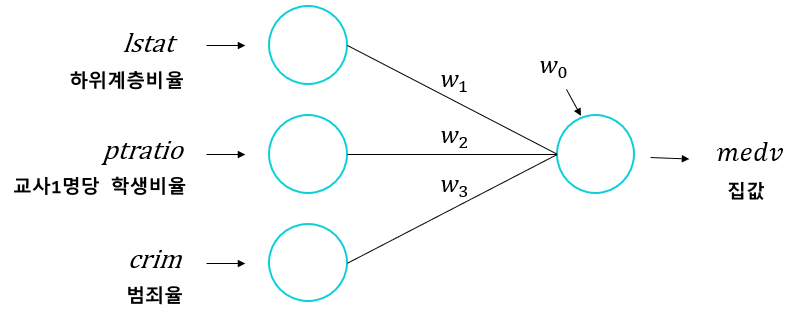

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [ ]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [ ]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [ ]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])
# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20, validation_split=0.2).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 594.0455 - val_loss: 559.8253
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 486.0561 - val_loss: 484.2917
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 417.1952 - val_loss: 420.0328
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 342.7810 - val_loss: 367.8967
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 321.5204 - val_loss: 325.4436
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 278.7930 - val_loss: 291.3334
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 221.9960 - val_loss: 265.6140
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 207.9111 - val_loss: 245.4126
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 208.0953 - val_loss: 229.2613
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 181.4095 - val_loss: 216.5453
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 189.2661 - val_loss: 206.1085
Epoch 12/20
11/11 ━━━━━━━━━━━

* 학습결과 그래프

In [ ]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

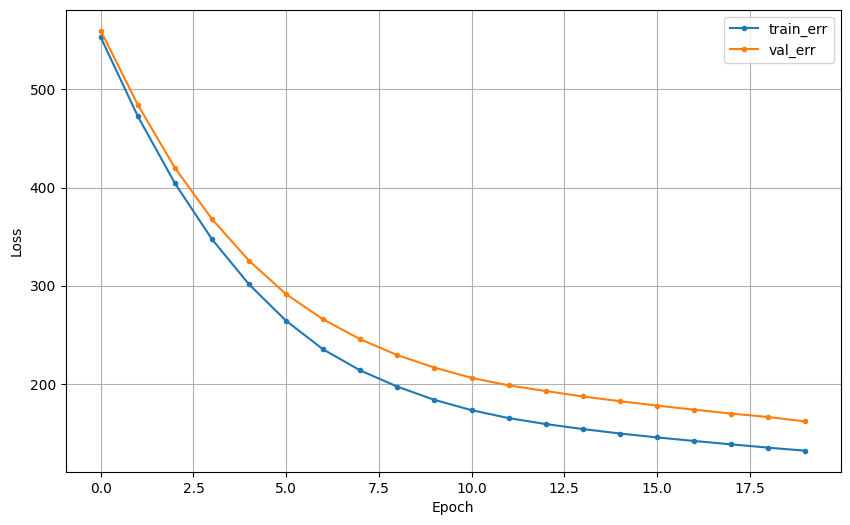

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 9.724806153708505
MAE  : 6.489189619176529
MAPE : 0.3410345137423396


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])

# 모델요약
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [ ]:
model2.compile( optimizer= 'adam', loss = 'mse' )

* 학습

In [ ]:
history = model2.fit(x_train, y_train, epochs = 20, validation_split= 0.2 ).history

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 570.5479 - val_loss: 631.7154
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 578.5439 - val_loss: 629.3560
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 573.2146 - val_loss: 626.9971
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 556.4047 - val_loss: 624.6415
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 600.4425 - val_loss: 622.2933
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 580.9638 - val_loss: 619.9646
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 591.1925 - val_loss: 617.5865
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 610.3769 - val_loss: 615.2637
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 549.3368 - val_loss: 612.9735
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 553.4301 - val_loss: 610.6628
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 540.7479 - val_loss: 608.4169
Epoch 12/20
11/11 ━━━━━━━━━━━

* 학습결과 그래프

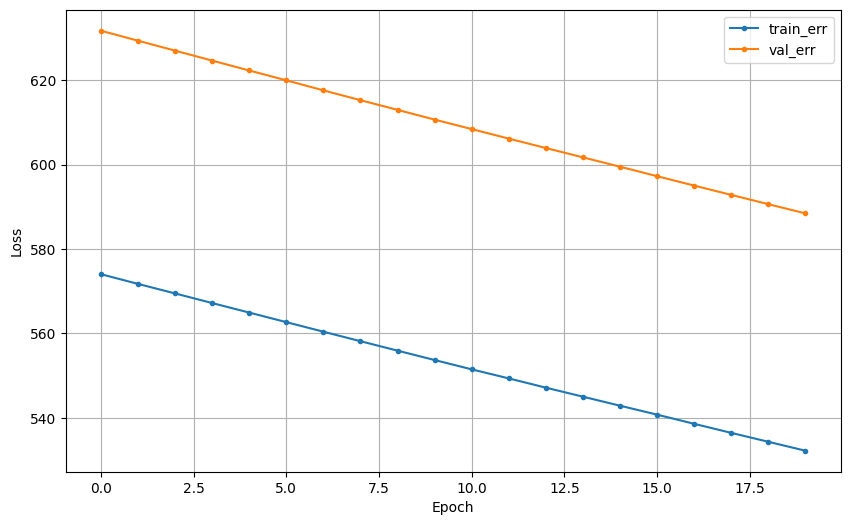

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model2.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE : 21.641398712565078
MAE  : 19.90921295396253
MAPE : 0.8982086819605247


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

12

In [ ]:
clear_session()
model3 = Sequential([Input(shape = (nfeatures,)),
                    Dense(1) ])
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [ ]:
model3.compile(optimizer = Adam( learning_rate = 0.1 ), loss = 'mse'  )

* 학습

In [ ]:
hist = model3.fit(x_train, y_train, epochs = 50, validation_split= .2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 594.5280 - val_loss: 491.8809
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 403.0627 - val_loss: 338.1150
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 280.7811 - val_loss: 251.8621
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 208.0962 - val_loss: 208.2081
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 153.1453 - val_loss: 186.1487
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 153.8265 - val_loss: 170.4294
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 149.9815 - val_loss: 156.6546
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129.7363 - val_loss: 144.0128
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117.2430 - val_loss: 132.0473
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 109.3220 - val_loss: 122.1718
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109.5550 - val_loss: 112.8543
Epoch 12/50
11/11 ━━━━━━━━━━━

* 학습결과 그래프

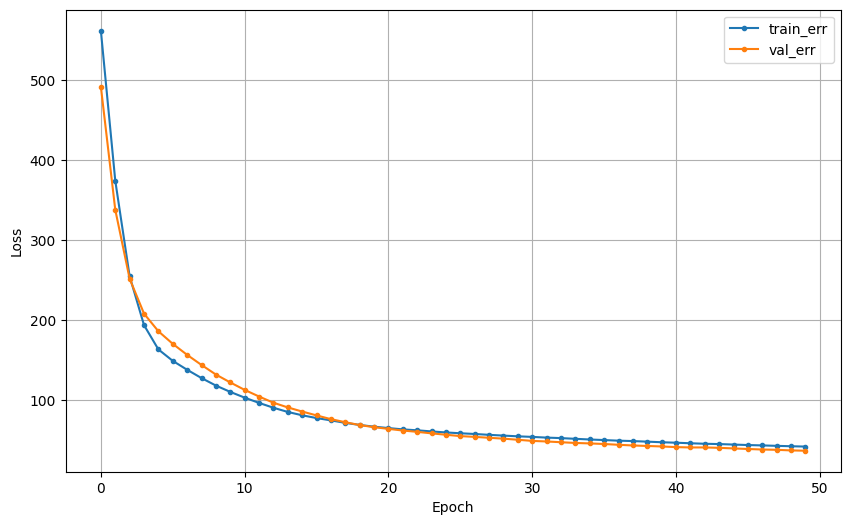

In [ ]:
dl_history_plot(hist)

* 예측 및 평가

In [ ]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE : 5.722051744969639
MAE  : 4.338526743533565
MAPE : 0.21790005427948547


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!)
model3 = Sequential([Input(shape = (nfeatures,)),
                     Dense(2, activation = 'relu'),
                     Dense(1)   ])

# 모델요약
model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [ ]:
model3.compile( optimizer= Adam(learning_rate=0.1), loss = 'mse')

* 학습

In [ ]:
hist = model3.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 489.0233 - val_loss: 285.1868
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 175.2015 - val_loss: 202.6700
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 166.1579 - val_loss: 127.3429
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 104.9061 - val_loss: 100.2854
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.2393 - val_loss: 68.7222
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.3448 - val_loss: 58.2741
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.3180 - val_loss: 49.6634
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.5860 - val_loss: 44.3370
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.0642 - val_loss: 45.4650
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.1783 - val_loss: 38.6880
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48.6674 - val_loss: 37.9719
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6

* 학습결과 그래프

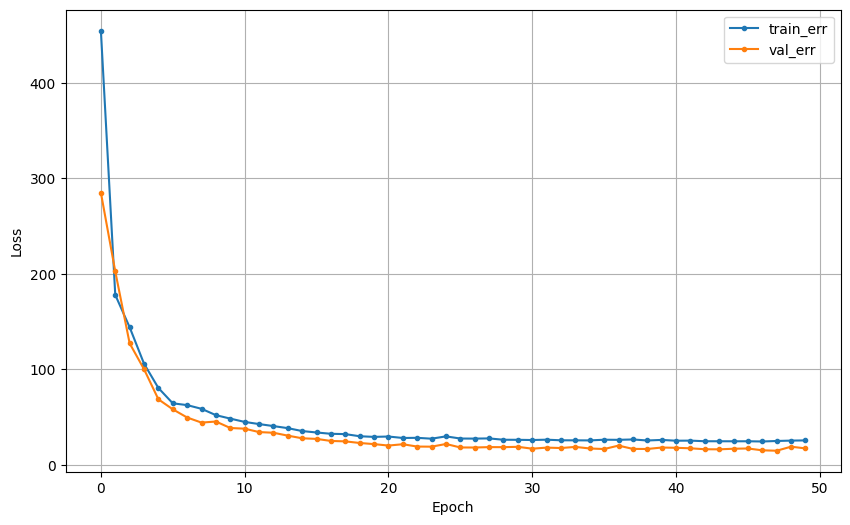

In [ ]:
dl_history_plot(hist)

* 예측 및 평가

In [ ]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE : 4.469074057992487
MAE  : 3.3721795110141533
MAPE : 0.16943061897372771


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [ ]:
nfeature = x_train.shape[1]

m1 = Sequential([Input(shape = (nfeatures,)),
                 Dense(8, activation = 'relu')
                , Dense(1) ])

m1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [ ]:
m1.compile( optimizer=Adam(learning_rate=.1), loss = 'mse')
hist = m1.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 455.6143 - val_loss: 241.8802
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 194.7412 - val_loss: 129.4669
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.1749 - val_loss: 67.5675
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.7770 - val_loss: 55.0375
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.5559 - val_loss: 46.1486
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.6957 - val_loss: 42.5576
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.1023 - val_loss: 37.2662
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.6369 - val_loss: 35.6529
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.3806 - val_loss: 29.8071
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.0999 - val_loss: 23.2185
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.6506 - val_loss: 23.5367
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

* 학습곡선

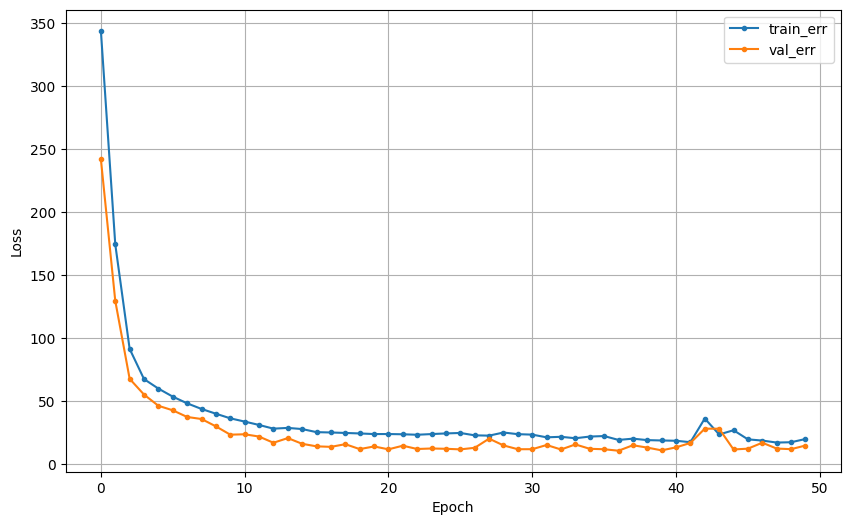

In [ ]:
dl_history_plot(hist)

* 검증

In [ ]:
p1 = m1.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, p1, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, p1)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, p1)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE : 4.08306609635751
MAE  : 3.0703757229973294
MAPE : 0.15637072630442206


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [ ]:
nfeatures = x_train.shape[1]
nfeatures

12

* 컴파일 + 학습

In [ ]:
clear_session()

model4 = Sequential([Input(shape = (nfeatures,)),
                     Dense(8, activation = 'relu') ,
                     Dense(4, activation= 'relu'),
                     Dense(1)])

model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model4.compile( optimizer= Adam(learning_rate=0.1)  , loss = 'mse'   )

* 학습곡선

In [ ]:
hist = model4.fit(x_train, y_train, epochs = 50    , validation_split = .2 ).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 435.9377 - val_loss: 125.9174
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121.7045 - val_loss: 71.9501
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.0716 - val_loss: 61.6342
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.0341 - val_loss: 46.5209
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.9262 - val_loss: 41.7914
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.7987 - val_loss: 61.4431
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.3341 - val_loss: 32.6608
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.9185 - val_loss: 26.7920
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.1665 - val_loss: 23.0547
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.5306 - val_loss: 18.2651
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.8434 - val_loss: 17.6655
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

* 검증

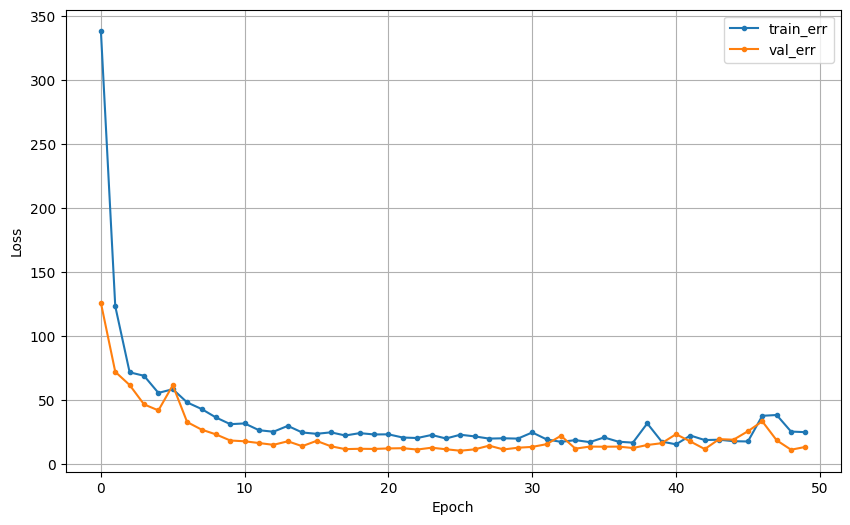

In [ ]:
dl_history_plot(hist)

In [ ]:
pred4 = model4.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred4, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred4)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred4)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE : 3.948497410469159
MAE  : 2.853139194787717
MAPE : 0.15042892721013212


* 회귀 모델 예측값 vs 실제값 그래프

In [ ]:
def visualization_result(y_val,pred):
    plt.figure(figsize = (5,5))
    y = x = np.linspace(y_val.min(), y_val.max(), 10)

    y_range = y_val.max() - y_val.min()
    mi, ma = y_val.min() - y_range*0.1 , y_val.max()+ y_range*0.1

    sns.scatterplot(x= pred.reshape(-1), y = y_val.values)
    sns.lineplot(x = x, y = y, color = 'r')
    plt.xlim(mi, ma)
    plt.ylim(mi, ma)
    plt.grid()

    plt.show()

visualization_result(y_val,pred2)